In [2]:
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from pathlib import Path
from matplotlib import cm
from matplotlib.colors import Normalize


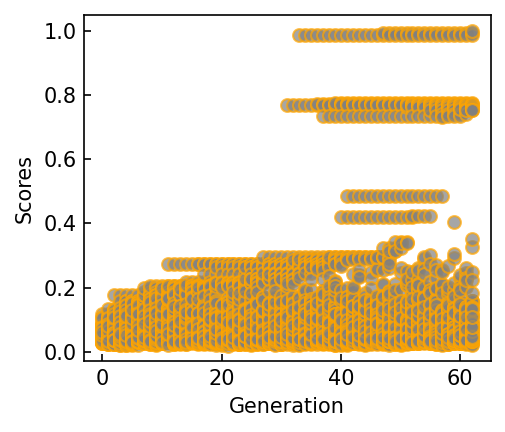

In [41]:
# # Fig 2b---- Scores vs generation

# scores = np.loadtxt('Data/scores_all_gen_pop_2b.dat')
# gen_no = np.loadtxt('Data/gen_all_gen_pop_2b.dat')

# n_pop=100
# #print(scores.shape, gen_no.shape)

# fig2b, ax2 = plt.subplots(figsize=(3.5, 3), dpi=150, facecolor='white')
# cmap = cm.viridis_r

# for i in range(gen_no.shape[0]):
#     ranks = np.argsort(np.argsort(scores[i, :]))
#     norm = Normalize(vmin=ranks.min(), vmax=ranks.max())
#     colors_score = cmap(norm(ranks))

#     ax2.scatter([gen_no[i]] * n_pop, scores[i], alpha=0.7, edgecolor='orange', color='grey', s=38)

# ax2.set_xlabel('Generation')
# ax2.set_ylabel('Scores')
# ax2.tick_params(direction='in')
# plt.savefig('Fig2b_revised.pdf', bbox_inches='tight')

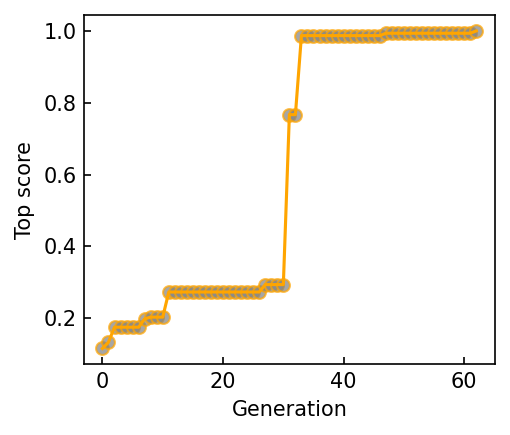

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ── Load data ──────────────────────────────────────────────────────────────
scores  = np.loadtxt('Data/scores_all_gen_pop_2b.dat')   # shape: (n_gen, n_pop)
gen_no  = np.loadtxt('Data/gen_all_gen_pop_2b.dat').ravel()  # shape: (n_gen,)

top_scores = scores.max(axis=1)          # one value per generation

# ── Plot ───────────────────────────────────────────────────────────────────
fig2b, ax2 = plt.subplots(figsize=(3.5, 3), dpi=150, facecolor='white')

ax2.scatter(gen_no, top_scores, alpha=0.7, edgecolor='orange', color='grey', s=38)
ax2.plot(gen_no, top_scores, color='orange')

ax2.set_xlabel('Generation')
ax2.set_ylabel('Top score')
ax2.tick_params(direction='in')
#ax2.legend()
fig2b.tight_layout()
plt.savefig('Fig2b_revised.pdf', bbox_inches='tight')
plt.show()


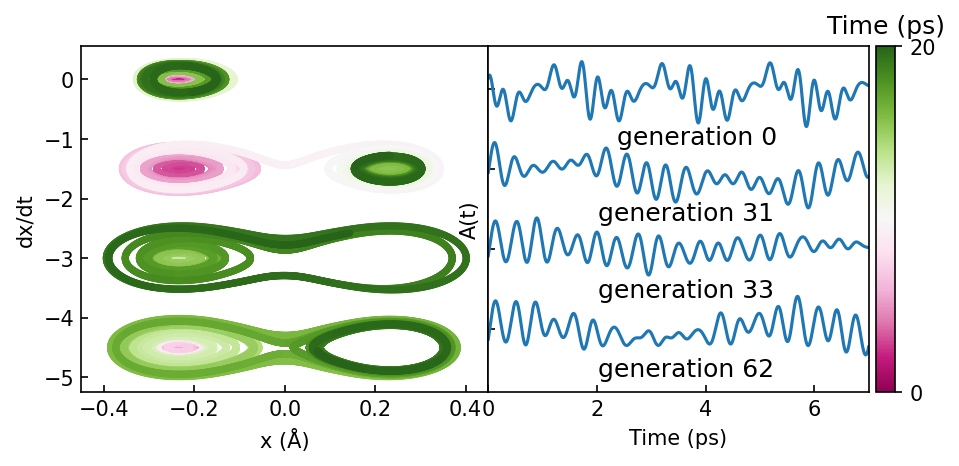

In [4]:
# Fig 2c---- Phase space + Protocols

from mpl_toolkits.axes_grid1 import make_axes_locatable

sol_x_all = np.loadtxt('Data/sol_x_all_gen_pop_2c.dat')
sol_v_all = np.loadtxt('Data/sol_v_all_gen_pop_2c.dat')
At_all = np.loadtxt('Data/protocol_all_gen_pop_2d.dat')

freq_in_thz = 6.3507799295888985 
t_in_ps = 1 / freq_in_thz

tspan = [0, 20/t_in_ps]
tfine = np.linspace(*tspan, 20000)
norm2 = Normalize(vmin=np.min(tfine*t_in_ps), vmax=np.max(tfine*t_in_ps))

fig2cd, (ax3,ax4) = plt.subplots(1,2,figsize=(7, 3), dpi=150, facecolor='white')
count=3
for idx in range(len(sol_x_all)-1,-1,-1):
    #print(idx)
    if idx==0 or idx==2 or idx==4 or idx==5:
        sc=ax3.scatter(sol_x_all[idx], sol_v_all[idx]-1.5*count, c = tfine*t_in_ps, cmap='PiYG', edgecolor='none', norm=norm2, s=12)
        ax4.plot(tfine*t_in_ps, At_all[idx]-(20*count), color='C0', label=f'gen {idx+1}')
        count=count-1

ax3.set_xlabel('x (Å)')
ax3.set_ylabel('dx/dt')
ax3.tick_params(direction='in')
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
cax.set_position([0.8, 0.2, 0.03, 0.6])
cbar = fig2cd.colorbar(sc, cax=cax,orientation='vertical')
cbar.ax.set_title('Time (ps)')
cbar.set_ticks([norm2.vmin, norm2.vmax])
cbar.ax.set_yticklabels(['0', '20'])

ax4.set_xlabel('Time (ps)')
ax4.set_ylabel('A(t)', labelpad=0.5)
ax4.set_xlim(0,7)
ax4.tick_params(direction='in')

ax4.text(0.76, 0.77, "generation 0", transform=ax4.transAxes,fontsize=12, va='top', ha='right')
ax4.text(0.75, 0.55, "generation 31", transform=ax4.transAxes,fontsize=12, va='top', ha='right')
ax4.text(0.75, 0.33, "generation 33", transform=ax4.transAxes,fontsize=12, va='top', ha='right')
ax4.text(0.75, 0.10, "generation 62", transform=ax4.transAxes,fontsize=12, va='top', ha='right')
ax4.set_yticklabels([])

xticks = ax3.get_xticks()
xticklabels = [item.get_text() for item in ax3.get_xticklabels()]
if xticklabels:
    xticklabels[-1] = ''
ax3.set_xticks(xticks)
ax3.set_xticklabels(xticklabels)
ax3.set_xlim(-0.45,0.45)

plt.subplots_adjust(wspace=0)
#plt.savefig('Fig2c_revised.pdf', bbox_inches='tight')

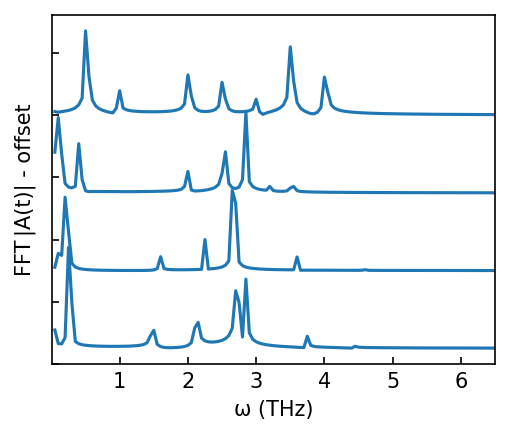

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# protocol data (shape: N_protocols × N_time_points)
At_all = np.loadtxt('Data/protocol_all_gen_pop_2d.dat')

freq_in_thz = 6.3507799295888985  
t_in_ps = 1 / freq_in_thz
tspan = [0, 20 / t_in_ps]
tfine = np.linspace(*tspan, 20000)

t_real = tfine * t_in_ps

# sampling interval in ps
dt_real = (t_real[1] - t_real[0]) 

# FFT for each protocol (At_all[i]) along axis=1

N_time = At_all.shape[1]
freq_all = np.fft.fftfreq(N_time, d=dt_real)  # in units of 1/ps = THz

fft_vals_all = np.fft.fft(At_all)
fft_mag_all = np.abs(fft_vals_all)

pos_mask = freq_all > 0
freq_pos = freq_all[pos_mask]

fig_fft, ax_fft = plt.subplots(
    1, 1,
    figsize=(3.5, 3),   
    dpi=150,
    facecolor='white'
)

offset_per_protocol = 25000.0
count=3
# Plot each protocol's FFT magnitude, offset by (offset_per_protocol × idx)
for idx in range(len(sol_x_all)-1,-1,-1):
    if idx==0 or idx==2 or idx==4 or idx==5:
        ax_fft.plot(
            freq_pos,
            fft_mag_all[idx, pos_mask] - (offset_per_protocol * count),
            color='C0',
            alpha=1.0,
            label=f'gen {idx}'
        )
        count=count-1

ax_fft.set_xlabel('ω (THz)')
ax_fft.set_ylabel('FFT |A(t)| - offset')
ax_fft.set_xlim(0.01, 6.5)
ax_fft.tick_params(direction='in')

ax_fft.set_yticklabels([])

plt.tight_layout()
#plt.savefig('Fig2_protocol_fft_revised.pdf', bbox_inches='tight')